In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px

# np.random.seed(27)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
meat_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/net-meat-production-in-nepal-by-district-.csv')
egg_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/production-of-egg-in-nepal-by-district.csv')

In [0]:
drop_list=['MOUNTAIN','HILLS','TERAI','REGION','NEPAL']

def remove_nondistrict(df,drop_list):
    mdf=df[~df['DISTRICT'].map(lambda x: any([l in x for l in drop_list]))]
    return mdf

mdf=remove_nondistrict(meat_df,drop_list)
edf=remove_nondistrict(egg_df,drop_list)


In [7]:
mdf['DISTRICT']=mdf['DISTRICT'].map(lambda x: 'SANKHUWASHAVA' if x=='SANKHUWASABHA' else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
me_df=pd.merge(mdf,edf,on='DISTRICT',how='inner')

Text(0.5, 1.0, 'Correlation Heatmap Meat Dataset')

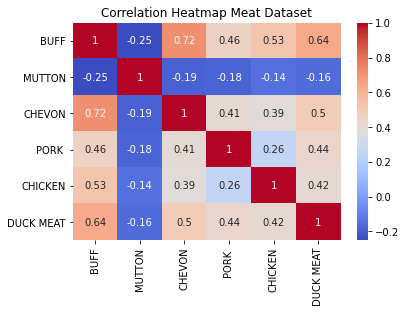

In [12]:
corr=mdf.drop(columns=['TOTAL MEAT']).corr()
sns.heatmap(corr, cmap='coolwarm',annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation Heatmap Meat Dataset')

In [0]:
columns_drop=['TOTAL MEAT','TOTAL EGG','LAYING DUCK','LAYING HEN','DUCK MEAT']
me_df=me_df.drop(columns=columns_drop)

## Standarization

In [0]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X=me_df.drop(columns=['DISTRICT'])
scaler.fit(X)
scaled_data=scaler.transform(X)
scaled_data.shape

(75, 7)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1)
pca =pca.fit(scaled_data)
scaled_transformed=pca.transform(scaled_data)

scaled_transformed_df=pd.DataFrame(scaled_transformed)
scaled_transformed_df.columns=['Feature 1','Feature 2','Feature 3']

colors = ['purple', 'maroon', 'green', 'yellow', 'skyblue', 'deeppink',  'red', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [0]:
plot_data=pd.DataFrame(scaled_transformed, columns=['Feature 1','Feature 2','Feature 3'])
plot_data['DISTRICT'] = me_df['DISTRICT'].tolist()

In [40]:
plot_data

,Feature 1,Feature 2,Feature 3,DISTRICT
0,-1.184252,0.041872,-0.400079,TAPLEJUNG
1,-0.372077,-0.212818,0.105649,SANKHUWASHAVA
2,-1.074595,-0.006867,-0.454869,SOLUKHUMBU
3,-0.047821,-0.596819,-0.695661,PANCHTHAR
4,-0.326281,-0.434229,-0.830870,ILLAM
...,...,...,...,...
70,-0.949357,-0.055440,-0.964370,DOTI
71,-1.085456,-0.078738,-1.019704,BAITADI
72,-1.191189,-0.016251,-1.039056,DADELDHURA
73,1.978032,-0.550976,1.404968,KAILALI


In [41]:
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Clusters by DBSCAN on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [0]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### **Elliptic Envelope**

In [0]:
# plot_data=plot_data[['Feature 1','Feature 2']]
plt_data=plot_data.iloc[:,0:2]

In [0]:
elip_env = EllipticEnvelope(random_state=0)
elip_env.fit(plt_data)
y_pred=elip_env.predict(plt_data)
# predict returns 1 for an inlier and -1 for an outlier

In [55]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [56]:
colors=np.array(['red','green'])
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color=colors[(y_pred+1)//2],hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Outliers by Eliptic Envelope on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [57]:
plt_data=plot_data.iloc[:,0:3]

elip_env = EllipticEnvelope(random_state=0)
elip_env.fit(plt_data)
y_pred=elip_env.predict(plt_data)

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color=colors[(y_pred+1)//2],hover_data=['DISTRICT'],width=900, height=600,size_max=10,opacity=0.7)
fig.update_layout(
    title="Outlier detection 3D Visualization on Agriculture Dataset ",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## **One Class SVM**

In [0]:
one_class=svm.OneClassSVM(kernel='rbf',gamma='auto')
plt_data2d=plot_data.iloc[:,0:2]
one_class.fit(plt_data2d)
y_pred2d=one_class.predict(plt_data2d)

one_class=svm.OneClassSVM(kernel='rbf',gamma='auto')
plt_data3d=plot_data.iloc[:,0:3]
one_class.fit(plt_data3d)
y_pred3d=one_class.predict(plt_data3d)

In [62]:
y_pred2d==y_pred3d

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [65]:
colors=np.array(['red','green'])
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color=colors[(y_pred2d+1)//2],hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Outliers by One Class SVM on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color=colors[(y_pred3d+1)//2],hover_data=['DISTRICT'],width=900, height=600)
fig.update_layout(
    title="OneClass SVM Outlier detection 3D Visualization on Agriculture Dataset ",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## **Isolation Forest**

In [0]:
iso_forest=IsolationForest(random_state=0)
plt_data2d=plot_data.iloc[:,0:2]
iso_forest.fit(plt_data2d)
y_pred2d=iso_forest.predict(plt_data2d)

iso_forest=IsolationForest(random_state=0)
plt_data3d=plot_data.iloc[:,0:3]
iso_forest.fit(plt_data3d)
y_pred3d=iso_forest.predict(plt_data3d)

In [69]:
colors=np.array(['red','green'])
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color=colors[(y_pred2d+1)//2],hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Outliers by Isolation Forest on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color=colors[(y_pred3d+1)//2],hover_data=['DISTRICT'],width=900, height=600)
fig.update_layout(
    title="Isolation Forest Outlier detection 3D Visualization on Agriculture Dataset ",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()


## **Local Outlier**

In [0]:
loc_outlier=LocalOutlierFactor()
plt_data2d=plot_data.iloc[:,0:2]
y_pred2d=loc_outlier.fit_predict(plt_data2d)


loc_outlier=LocalOutlierFactor()
plt_data3d=plot_data.iloc[:,0:3]
y_pred3d=loc_outlier.fit_predict(plt_data3d)

In [74]:
colors=np.array(['red','green'])
fig=px.scatter(plot_data, x= 'Feature 1',y='Feature 2',color=colors[(y_pred2d+1)//2],hover_data=['DISTRICT'],width=800, height=600)
fig.update_layout(
    title="Outliers by Local Outlier on Agriculture Dataset",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

fig=px.scatter_3d(plot_data, x= 'Feature 1',y='Feature 2',z='Feature 3',color=colors[(y_pred3d+1)//2],hover_data=['DISTRICT'],width=900, height=600)
fig.update_layout(
    title="Local Outlier detection 3D Visualization on Agriculture Dataset ",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()
